<h2 align=center> Facial Expression Recognition</h2>

### Task 1: Import Libraries

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utilsJorge
import os
import pprint as pp
import torchvision

from sklearn import datasets

import numpy as np

import torch
from torch.utils.data import Dataset 
from torch.utils.data import random_split
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader


from torchvision import transforms,utils,datasets

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler








from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
import torch as tch
print("Tensorflow version:", tf.__version__)
print("Torch version:",tch.__version__)

Tensorflow version: 2.11.0
Torch version: 2.0.0


In [17]:
dataset = torchvision.datasets.ImageFolder(root=  "C:/Users/jorge/anaconda3/envs/tfgjorge/TFGprueba/train")
print(datasets.class_to_idx)

AttributeError: module 'torchvision.datasets' has no attribute 'class_to_idx'

In [2]:

samples = 2000

X_data, Y_data = datasets.make_blobs(n_samples= samples, n_features=4, centers=[(0,5),(4,0)], random_state=0)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (329086867.py, line 1)

In [38]:
class CreateDataset(Dataset):
    def __init__(self, x, y):
        self.x = X_data
        self.y = Y_data
    def __getitem__(self, index):
        sample = {'feature': torch.tensor([self.x[index]], dtype=torch.float32), 
                      'label': torch.tensor([self.y[index]], dtype=torch.long)}
        return sample
    def __len__(self):
        return len(self.x)
        

In [39]:
torch_dataset = CreateDataset(X_data, Y_data)
print("length of the dataset is:", len(torch_dataset))

length of the dataset is: 2000


In [40]:
train_data, test_data = random_split(torch_dataset, [1400, 600])
print("The length of train data is:",len(train_data))
print("The length of test data is:",len(test_data))

The length of train data is: 1400
The length of test data is: 600


### Task 2: Plot Sample Images

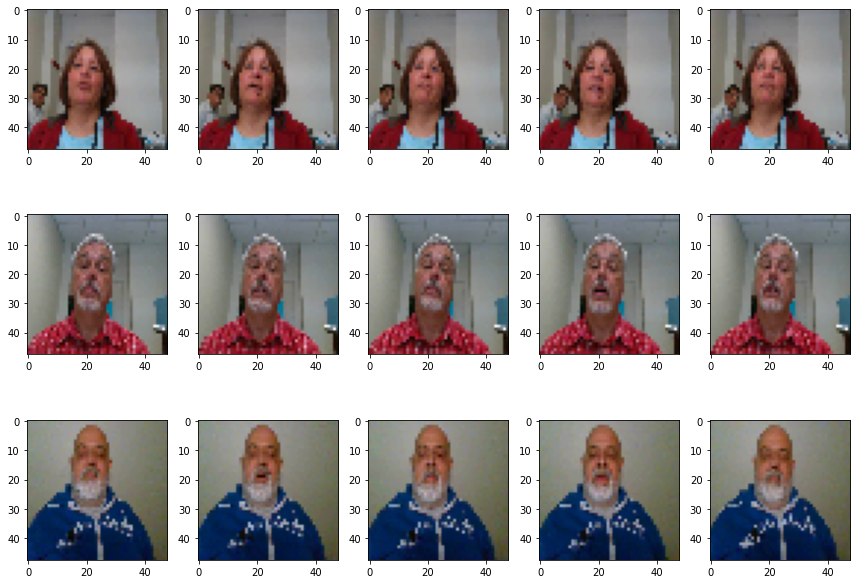

In [4]:
utilsJorge.datasets.fer.plot_example_images(plt).show()

In [5]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

920 ALS images
2386 HEALTHY images
1371 STROKE images


NameError: name 'train' is not defined

### Task 3: Generate Training and Validation Batches

In [6]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 4677 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


### Task 4: Create CNN Model

In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

### Task 6: Train and Evaluate Model

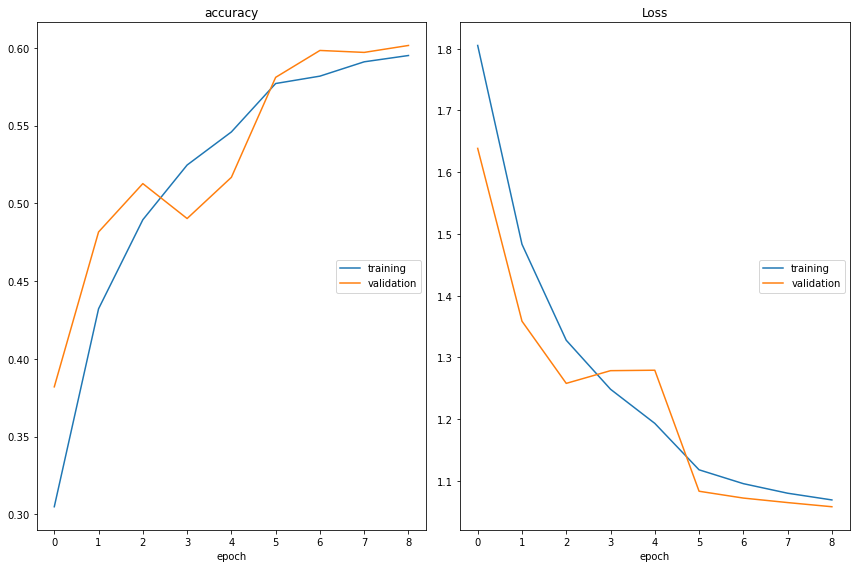

accuracy
	training         	 (min:    0.305, max:    0.595, cur:    0.595)
	validation       	 (min:    0.382, max:    0.602, cur:    0.602)
Loss
	training         	 (min:    1.069, max:    1.805, cur:    1.069)
	validation       	 (min:    1.058, max:    1.639, cur:    1.058)

Epoch 9: saving model to model_weights.h5
448/448 [==============================] - 843s 2s/step - loss: 1.0694 - accuracy: 0.5951 - val_loss: 1.0583 - val_accuracy: 0.6016 - lr: 5.0000e-05
Epoch 10/15
 43/448 [=>............................] - ETA: 17:14 - loss: 1.0693 - accuracy: 0.5843

In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

### Task 7: Represent Model as JSON String

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)